In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_t=pd.read_csv("train.csv")

In [3]:
data_t

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
# data_t.dropna(inplace=True)
# data_t.info()

In [5]:
data_s=pd.read_csv("sample_submission.csv")

In [6]:
data_s

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

Data Cleaning

In [7]:
data_t.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
sum(data_t.duplicated()) 

0

In [10]:
data_t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
data_t["LotFrontage"].isnull().sum()

259

In [12]:
mean_value=data_t["LotFrontage"].mean()
mean_value

70.04995836802665

In [13]:
data_t["LotFrontage"].fillna(mean_value, inplace=True)

In [14]:
data_t["LotFrontage"].isnull().sum()

0

In [15]:
data_t["LotFrontage"]=data_t["LotFrontage"].astype('int64')


In [16]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
data_t["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [18]:
data_t["Street"]

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object

In [19]:
data_t["Alley"].isnull().sum()

1369

In [20]:
data_t.drop(columns=["Alley"], inplace=True)

In [21]:
data_t.shape

(1460, 80)

In [22]:
data_t["MasVnrArea"].isnull().sum()

8

In [23]:
meaan=data_t["MasVnrArea"].mean()
meaan

103.68526170798899

In [24]:
data_t["MasVnrArea"].fillna(meaan, inplace=True)

In [25]:
data_t["MasVnrArea"]=data_t["MasVnrArea"].astype("int64")

In [26]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [27]:
data_t["BsmtQual"].isnull().sum()

37

In [28]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["BsmtQual"].fillna(value_to_fill, inplace=True)

In [29]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["MasVnrType"].fillna(value_to_fill, inplace=True)

In [30]:
data_t["BsmtCond"].isnull().sum()

37

In [31]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["BsmtCond"].fillna(value_to_fill, inplace=True)

In [32]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [33]:
data_t["BsmtExposure"].isnull().sum()

38

In [34]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["BsmtExposure"].fillna(value_to_fill, inplace=True)

In [35]:
data_t["BsmtExposure"].isnull().sum()

0

In [36]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["BsmtFinType1"].fillna(value_to_fill, inplace=True)

In [37]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["BsmtFinType2"].fillna(value_to_fill, inplace=True)

In [38]:
data_t= data_t.drop('FireplaceQu', axis=1)

In [39]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [40]:
data_t["GarageType"].isnull().sum()

81

In [41]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["GarageType"].fillna(value_to_fill, inplace=True)

In [42]:
data_t["GarageYrBlt"].isnull().sum()

81

In [43]:
meaan=data_t["GarageYrBlt"].mean()
meaan

1978.5061638868744

In [44]:
data_t["GarageYrBlt"].fillna(meaan, inplace=True)

In [45]:
data_t.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0    1          60       RL           65     8450   Pave      Reg         Lvl   
1    2          20       RL           80     9600   Pave      Reg         Lvl   
2    3          60       RL           68    11250   Pave      IR1         Lvl   
3    4          70       RL           60     9550   Pave      IR1         Lvl   
4    5          60       RL           84    14260   Pave      IR1         Lvl   
5    6          50       RL           85    14115   Pave      IR1         Lvl   
6    7          20       RL           75    10084   Pave      Reg         Lvl   
7    8          60       RL           70    10382   Pave      IR1         Lvl   
8    9          50       RM           51     6120   Pave      Reg         Lvl   
9   10         190       RL           50     7420   Pave      Reg         Lvl   
10  11          20       RL           70    11200   Pave      Reg         Lvl   
11  12          60       RL           85    11924   Pave      IR1         Lvl   
12  13          20       RL           70    12968   Pave      IR2         Lvl   
13  14          20       RL           91    10652   Pave      IR1         Lvl   
14  15          20       RL           70    10920   Pave      IR1         Lvl   
15  16          45       RM           51     6120   Pave      Reg         Lvl   
16  17          20       RL           70    11241   Pave      IR1         Lvl   
17  18          90       RL           72    10791   Pave      Reg         Lvl   
18  19          20       RL           66    13695   Pave      Reg         Lvl   
19  20          20       RL           70     7560   Pave      Reg         Lvl   

   Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature MiscVal MoSold  \
0     AllPub    Inside  ...        0    NaN    NaN         NaN       0      2   
1     AllPub       FR2  ...        0    NaN    NaN         NaN       0      5   
2     AllPub    Inside  ...        0    NaN    NaN         NaN       0      9   
3     AllPub    Corner  ...        0    NaN    NaN         NaN       0      2   
4     AllPub       FR2  ...        0    NaN    NaN         NaN       0     12   
5     AllPub    Inside  ...        0    NaN  MnPrv        Shed     700     10   
6     AllPub    Inside  ...        0    NaN    NaN         NaN       0      8   
7     AllPub    Corner  ...        0    NaN    NaN        Shed     350     11   
8     AllPub    Inside  ...        0    NaN    NaN         NaN       0      4   
9     AllPub    Corner  ...        0    NaN    NaN         NaN       0      1   
10    AllPub    Inside  ...        0    NaN    NaN         NaN       0      2   
11    AllPub    Inside  ...        0    NaN    NaN         NaN       0      7   
12    AllPub    Inside  ...        0    NaN    NaN         NaN       0      9   
13    AllPub    Inside  ...        0    NaN    NaN         NaN       0      8   
14    AllPub    Corner  ...        0    NaN   GdWo         NaN       0      5   
15    AllPub    Corner  ...        0    NaN  GdPrv         NaN       0      7   
16    AllPub   CulDSac  ...        0    NaN    NaN        Shed     700      3   
17    AllPub    Inside  ...        0    NaN    NaN        Shed     500     10   
18    AllPub    Inside  ...        0    NaN    NaN         NaN       0      6   
19    AllPub    Inside  ...        0    NaN  MnPrv         NaN       0      5   

    YrSold  SaleType  SaleCondition  SalePrice  
0     2008        WD         Normal     208500  
1     2007        WD         Normal     181500  
2     2008        WD         Normal     223500  
3     2006        WD        Abnorml     140000  
4     2008        WD         Normal     250000  
5     2009        WD         Normal     143000  
6     2007        WD         Normal     307000  
7     2009        WD         Normal     200000  
8     2008        WD        Abnorml     129900  
9     2008        WD         Normal     118000  
10    2008        WD         Normal     129500  
11    2006  

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
data_t.tail(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1440  1441          70       RL           79    11526   Pave      IR1   
1441  1442         120       RM           70     4426   Pave      Reg   
1442  1443          60       FV           85    11003   Pave      Reg   
1443  1444          30       RL           70     8854   Pave      Reg   
1444  1445          20       RL           63     8500   Pave      Reg   
1445  1446          85       RL           70     8400   Pave      Reg   
1446  1447          20       RL           70    26142   Pave      IR1   
1447  1448          60       RL           80    10000   Pave      Reg   
1448  1449          50       RL           70    11767   Pave      Reg   
1449  1450         180       RM           21     1533   Pave      Reg   
1450  1451          90       RL           60     9000   Pave      Reg   
1451  1452          20       RL           78     9262   Pave      Reg   
1452  1453         180       RM           35     3675   Pave      Reg   
1453  1454          20       RL           90    17217   Pave      Reg   
1454  1455          20       FV           62     7500   Pave      Reg   
1455  1456          60       RL           62     7917   Pave      Reg   
1456  1457          20       RL           85    13175   Pave      Reg   
1457  1458          70       RL           66     9042   Pave      Reg   
1458  1459          20       RL           68     9717   Pave      Reg   
1459  1460          20       RL           75     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1440         Bnk    AllPub    Inside       Mod      Crawfor       Norm   
1441         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1442         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1443         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
1444         Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
1445         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1446         Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
1447         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1448         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1449         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1450         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1451         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1440       Norm     1Fam     2.5Fin            6            7       1922   
1441       Norm   TwnhsE     1Story            6            5       2004   
1442       Norm     1Fam     2Story           10            5       2008   
1443       Norm     1Fam     1.5Unf            6            6       1916   
1444       Norm     1Fam     1Story            7            5       2004   
1445       Norm     1Fam     SFoyer            6            5       1966   
1446       Norm     1Fam     1Story            5            7       1962   
1447       Norm     1Fam     2Story            8            5       1995   
1448       Norm     1Fam     2Story            4            7       1910   
1449       Norm    Twnhs     SFoyer            5            7       1970   
1450       Norm   Duplex     2Story            5            5       1974   
1451   

In [48]:
data_t["GarageFinish"].isnull().sum()

81

In [49]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["GarageFinish"].fillna(value_to_fill, inplace=True)

In [50]:
data_t["GarageYrBlt"]=data_t["GarageYrBlt"].astype("int64")

In [51]:
data_t["GarageQual"].isnull().sum()

81

In [52]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["GarageQual"].fillna(value_to_fill, inplace=True)

In [53]:
data_t["GarageCond"].isnull().sum()

81

In [54]:
value_to_fill = 0

# Fill null values in the specified column with the chosen value
data_t["GarageCond"].fillna(value_to_fill, inplace=True)

In [55]:
data_t= data_t.drop('PoolQC', axis=1)

In [56]:
columns_to_drop = ['Fence', 'MiscFeature']
data_t= data_t.drop(columns=columns_to_drop)

In [57]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [58]:
data_t.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.041096   10516.828082     6.099315   
std     421.610009    42.300571    22.024031    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.681507   443.639726   
std       1.112799    30.202904     20.645407   180.569120   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.478082     1.767123   472.980137    94.244521    46.660274   
std      23.994863     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   334.500000     0.000000     0.000000   
50%    1978.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [59]:
data_t.shape

(1460, 76)

In [60]:
data_t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [61]:
data_t.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [62]:
data_t.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

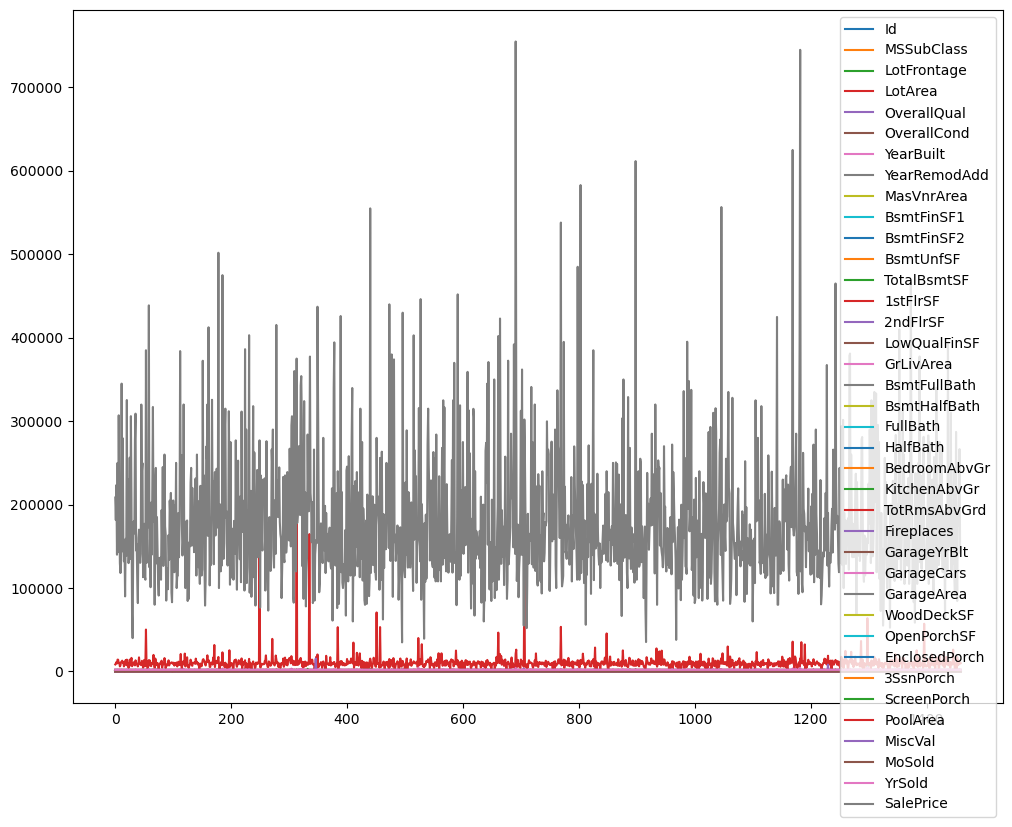

In [63]:
plt.rcParams['figure.figsize'] = [12, 9]#resize the plot
#plt.figure(figsize = (12, 8))

data_t.plot()
plt.show()

In [64]:
#ID columns does not relevant for our analysis.
data_t.drop('Id', axis = 1, inplace=True)


In [65]:
data_t.mean()

MSSubClass           56.897260
LotFrontage          70.041096
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.681507
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.478082
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPorch          15.060959
PoolArea

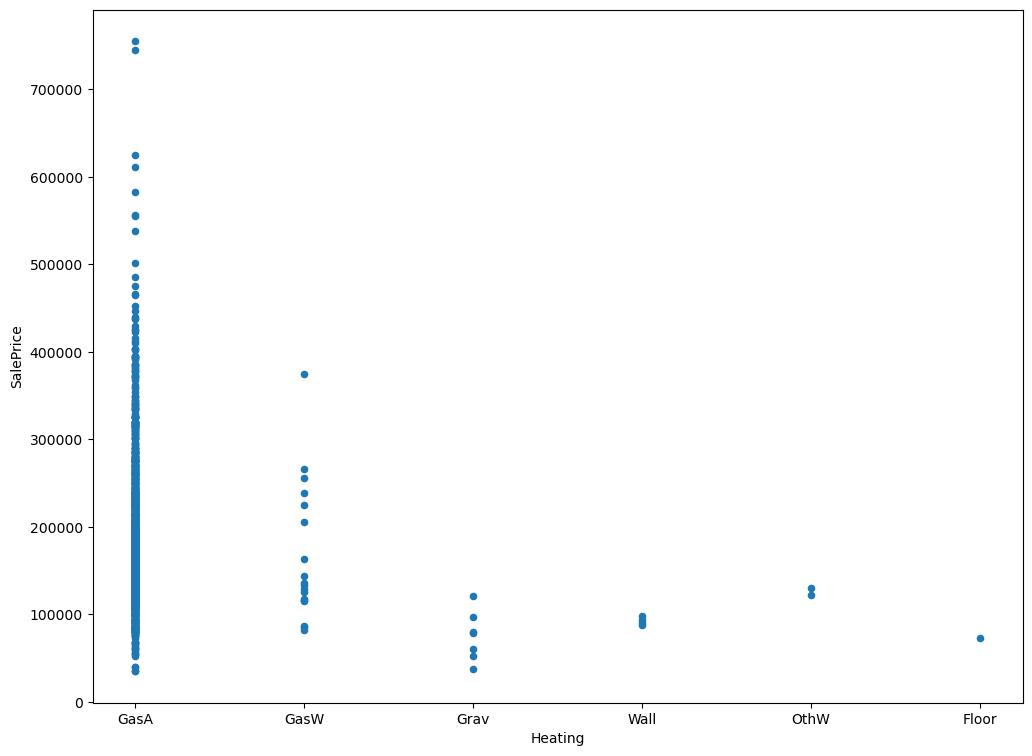

In [66]:
data_t.plot.scatter('Heating', 'SalePrice');


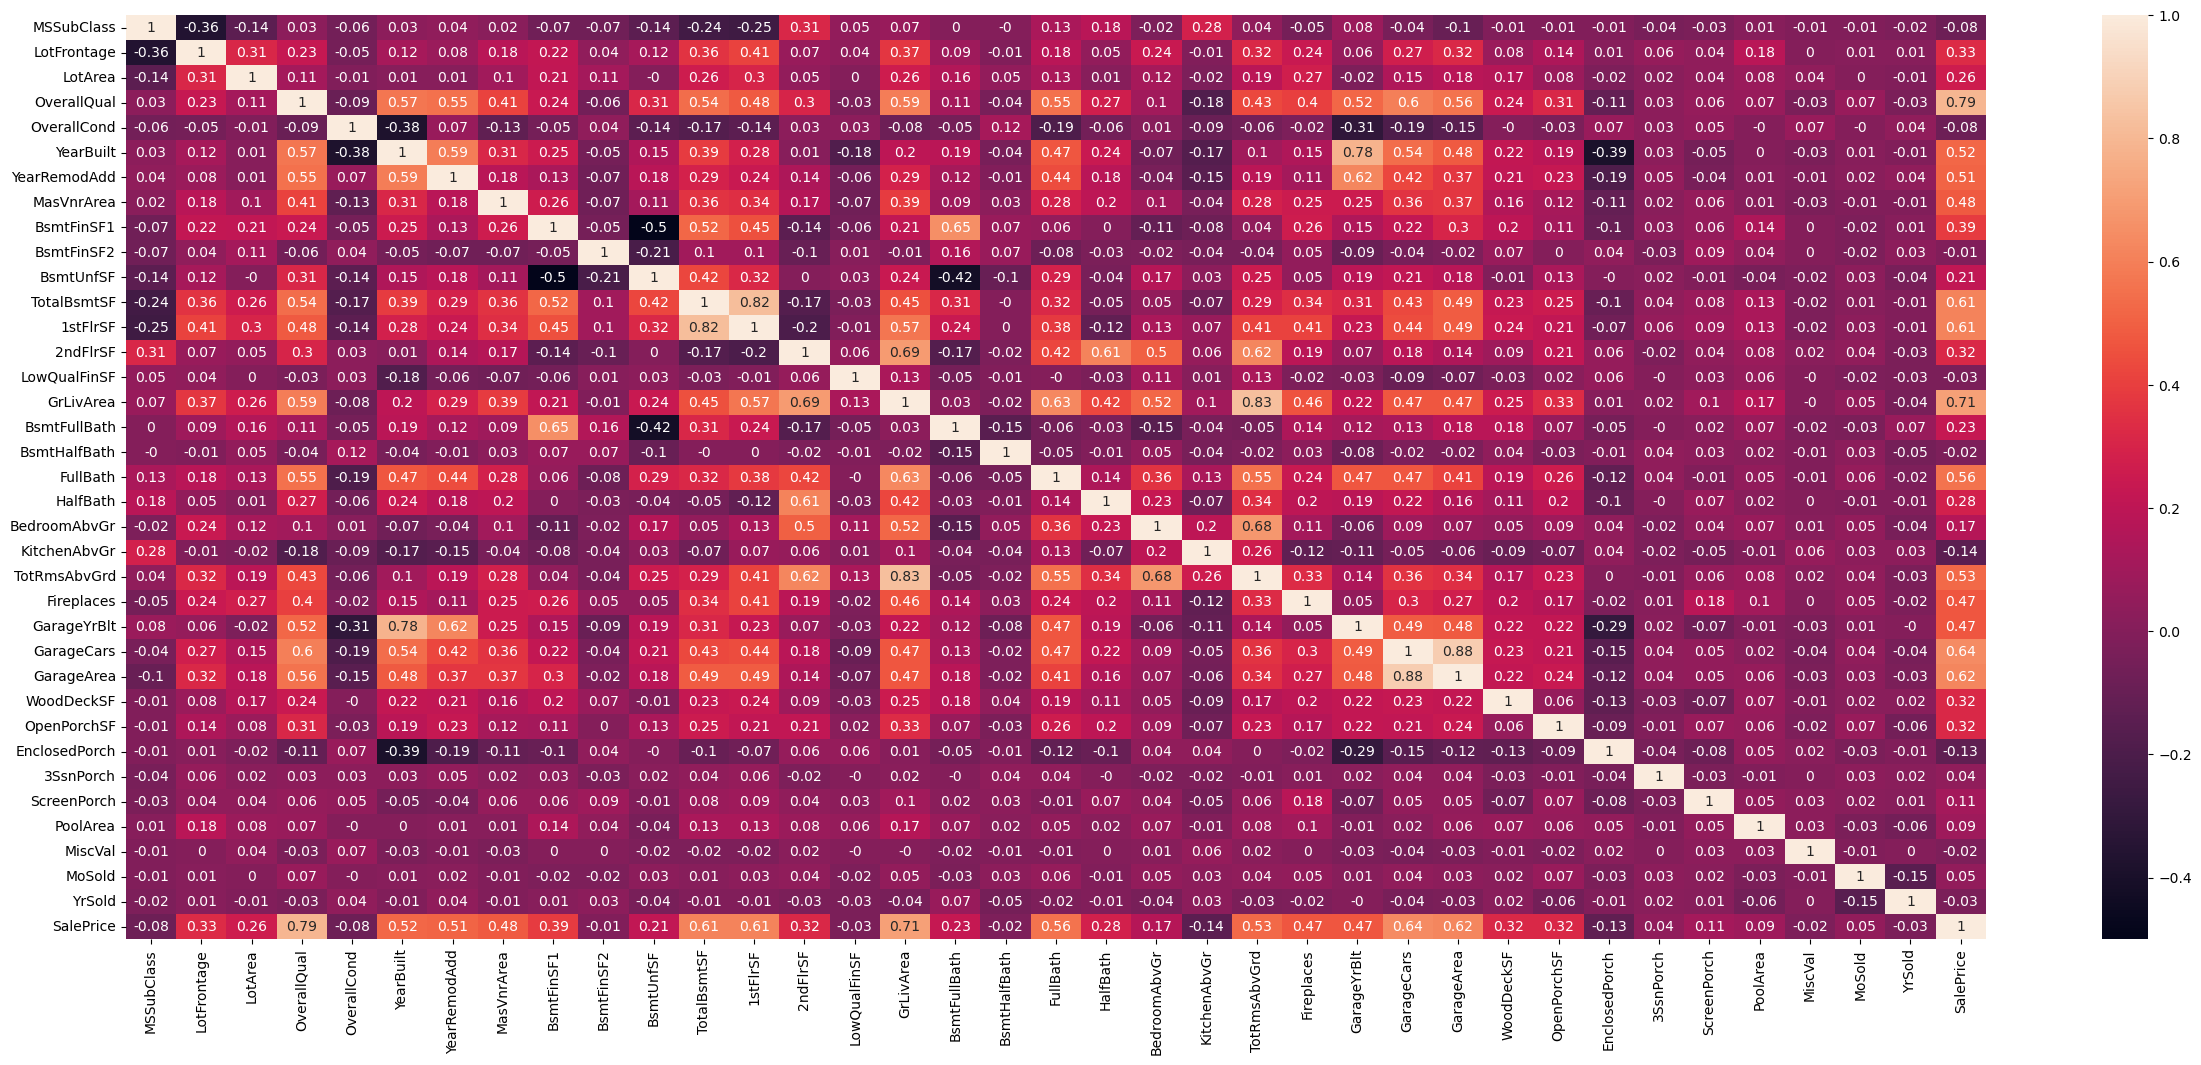

In [67]:
# Correlation
plt.subplots(figsize=(30,12))
correlation = data_t.corr().round(2)
sns_plot=sns.heatmap(correlation, annot=True)

In [68]:
print(correlation['SalePrice'])

MSSubClass      -0.08
LotFrontage      0.33
LotArea          0.26
OverallQual      0.79
OverallCond     -0.08
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.48
BsmtFinSF1       0.39
BsmtFinSF2      -0.01
BsmtUnfSF        0.21
TotalBsmtSF      0.61
1stFlrSF         0.61
2ndFlrSF         0.32
LowQualFinSF    -0.03
GrLivArea        0.71
BsmtFullBath     0.23
BsmtHalfBath    -0.02
FullBath         0.56
HalfBath         0.28
BedroomAbvGr     0.17
KitchenAbvGr    -0.14
TotRmsAbvGrd     0.53
Fireplaces       0.47
GarageYrBlt      0.47
GarageCars       0.64
GarageArea       0.62
WoodDeckSF       0.32
OpenPorchSF      0.32
EnclosedPorch   -0.13
3SsnPorch        0.04
ScreenPorch      0.11
PoolArea         0.09
MiscVal         -0.02
MoSold           0.05
YrSold          -0.03
SalePrice        1.00
Name: SalePrice, dtype: float64


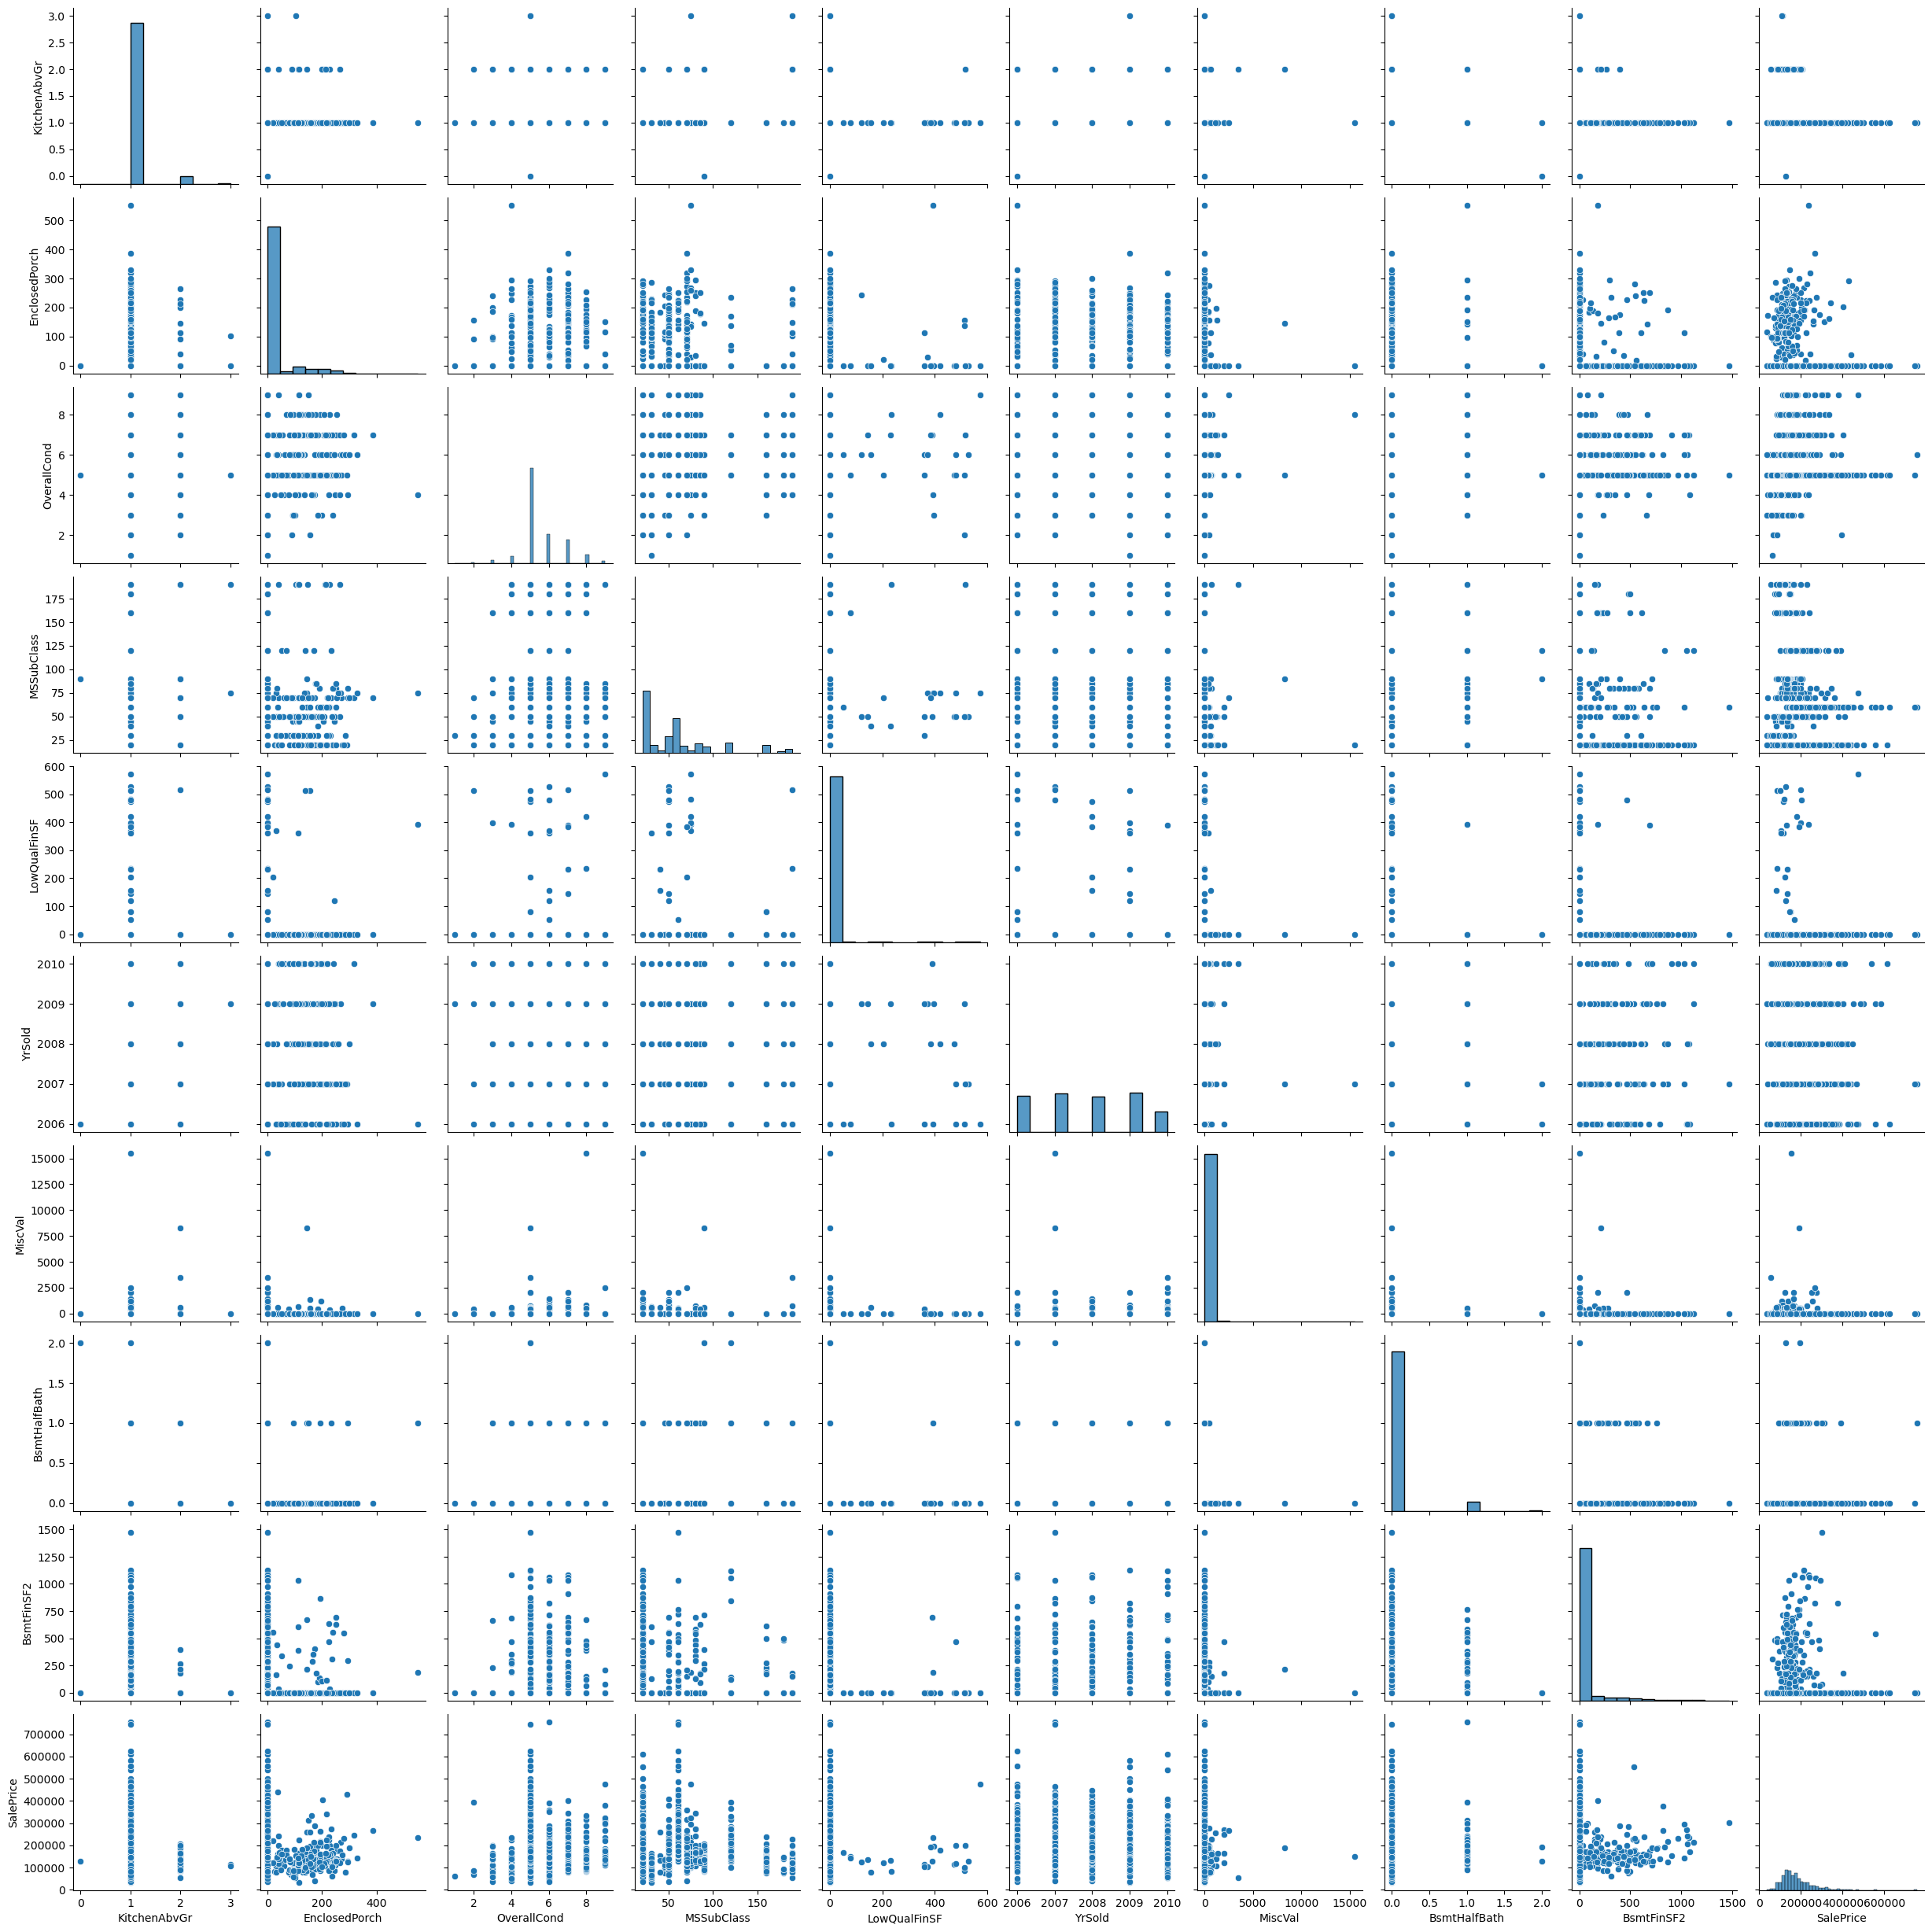

In [69]:
sns.pairplot(data_t, vars = ['KitchenAbvGr', 'EnclosedPorch', 'OverallCond', 'MSSubClass', 'LowQualFinSF', 'YrSold', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2','SalePrice']);

In [70]:
data_t

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL           65     8450   Pave      Reg         Lvl   
1             20       RL           80     9600   Pave      Reg         Lvl   
2             60       RL           68    11250   Pave      IR1         Lvl   
3             70       RL           60     9550   Pave      IR1         Lvl   
4             60       RL           84    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL           62     7917   Pave      Reg         Lvl   
1456          20       RL           85    13175   Pave      Reg         Lvl   
1457          70       RL           66     9042   Pave      Reg         Lvl   
1458          20       RL           68     9717   Pave      Reg         Lvl   
1459          20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace         196   
1        Gable  CompShg     MetalSd     MetalSd       None           0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace         162   
3        Gable  CompShg     Wd Sdng     Wd Shng       None           0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace         350   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None           0   
1456     Gable  CompShg     Plywood     Plywood      Stone         119   
1457     Gable  CompShg     CemntBd     CmentBd       None           0   
1458       Hip  CompShg     MetalSd     MetalSd       None           0   
1459     Gable  CompShg     HdBoard     HdBoard       None           0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd         

In [71]:
x=data_t.drop(['SalePrice'],axis=1)
y=data_t['SalePrice']

In [72]:
x

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL           65     8450   Pave      Reg         Lvl   
1             20       RL           80     9600   Pave      Reg         Lvl   
2             60       RL           68    11250   Pave      IR1         Lvl   
3             70       RL           60     9550   Pave      IR1         Lvl   
4             60       RL           84    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL           62     7917   Pave      Reg         Lvl   
1456          20       RL           85    13175   Pave      Reg         Lvl   
1457          70       RL           66     9042   Pave      Reg         Lvl   
1458          20       RL           68     9717   Pave      Reg         Lvl   
1459          20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace         196   
1        Gable  CompShg     MetalSd     MetalSd       None           0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace         162   
3        Gable  CompShg     Wd Sdng     Wd Shng       None           0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace         350   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None           0   
1456     Gable  CompShg     Plywood     Plywood      Stone         119   
1457     Gable  CompShg     CemntBd     CmentBd       None           0   
1458       Hip  CompShg     MetalSd     MetalSd       None           0   
1459     Gable  CompShg     HdBoard     HdBoard       None           0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd         

In [73]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

In [75]:
train_data=x_train.join(y_train)

In [76]:
train_data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
700           20       RL           85    14331   Pave      Reg         Lvl   
791           80       RL           70    11333   Pave      IR1         Lvl   
208           60       RL           70    14364   Pave      IR1         Low   
166           20       RL           70    10708   Pave      IR1         Lvl   
1422         120       RM           37     4435   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
823           50       RL           60     9900   Pave      Reg         Lvl   
64            60       RL           70     9375   Pave      Reg         Lvl   
272           60       RL           92    11764   Pave      IR1         Lvl   
479           30       RM           50     5925   Pave      Reg         Bnk   
578          160       FV           34     3604   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
700     AllPub    Inside       Gtl       Timber       Norm       Norm   
791     AllPub    Corner       Gtl      Mitchel       Norm       Norm   
208     AllPub    Inside       Mod      SawyerW       Norm       Norm   
166     AllPub    Inside       Gtl      ClearCr       Norm       Norm   
1422    AllPub    Inside       Gtl      CollgCr       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
823     AllPub    Inside       Gtl        SWISU       Norm       Norm   
64      AllPub    Inside       Gtl      CollgCr       Norm       Norm   
272     AllPub   CulDSac       Gtl      NoRidge       Norm       Norm   
479     AllPub    Inside       Gtl      OldTown       Norm       Norm   
578     AllPub    Corner       Gtl      Somerst       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
700      1Fam     1Story            8            5       2002          2002   
791      1Fam       SLvl            6            5       1976          1976   
208      1Fam     2Story            7            5       1988          1989   
166      1Fam     1Story            5            5       1955          1993   
1422   TwnhsE     1Story            6            5       2003          2003   
...       ...        ...          ...          ...        ...           ...   
823      1Fam     1.5Fin            6            7       1940          1950   
64       1Fam     2Story            7            5       1997          1998   
272      1Fam     2Story            8            7       1999          2007   
479      1Fam     1Story            4            7       1937          2000   
578    TwnhsE     2Story            7            5       2007          2007   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
700        Hip  CompShg     VinylSd     VinylSd    BrkFace         630   
791      Gable  CompShg     HdBoard     HdBoard       None           0   
208      Gable  CompShg     Plywood     Plywood    BrkFace         128   
166        Hip  CompShg     Wd Sdng     Wd Sdng       None           0   
1422     Gable  CompShg     VinylSd     VinylSd    BrkFace         170   
...        ...      ...         ...         ...        ...         ...   
823      Gable  CompShg     VinylSd     VinylSd       None           0   
64       Gable  CompShg     VinylSd     VinylSd    BrkFace         573   
272      Gable  CompShg     VinylSd     VinylSd    BrkFace         348   
479        Hip  CompShg      Stucco      Stucco     BrkCmn         435   
578      Gable  CompShg     VinylSd     VinylSd       None           0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
700         Gd        TA      PConc       Ex       TA           Gd   
791         TA        TA      PConc       Gd       TA           Av   
208         Gd        TA     CBlock       Gd       TA           Gd   
166         Gd        TA     CBlock       TA       TA         

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

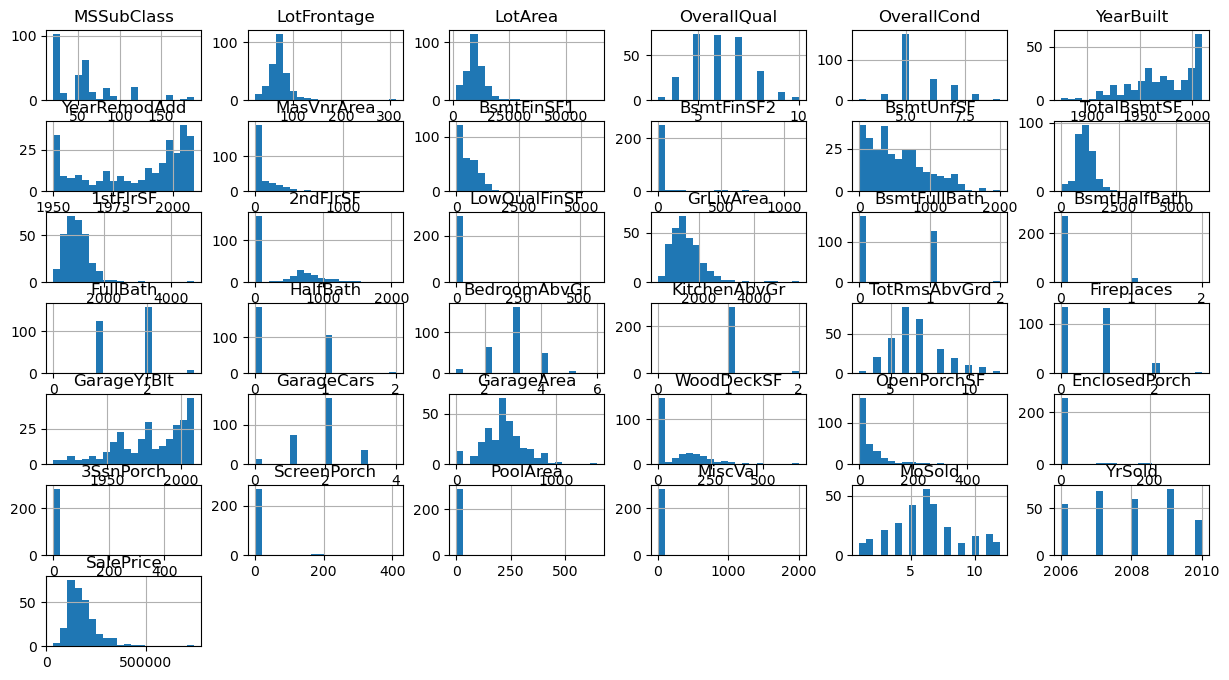

In [77]:
train_data.hist(figsize=(15,8),bins=20)

In [78]:
train_data.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.230866 -0.229937     0.142691    -0.117288   
LotFrontage     -0.230866     1.000000  0.681667     0.297772     0.015003   
LotArea         -0.229937     0.681667  1.000000     0.290127     0.003949   
OverallQual      0.142691     0.297772  0.290127     1.000000    -0.123891   
OverallCond     -0.117288     0.015003  0.003949    -0.123891     1.000000   
YearBuilt        0.079699     0.066571  0.042367     0.554747    -0.367340   
YearRemodAdd     0.037548     0.116609  0.073641     0.473193     0.082155   
MasVnrArea       0.074304     0.170867  0.204739     0.342983    -0.087501   
BsmtFinSF1      -0.041727     0.443388  0.480060     0.314989    -0.058032   
BsmtFinSF2      -0.060534     0.062496  0.114794    -0.101618     0.046764   
BsmtUnfSF       -0.122183    -0.001355  0.013349     0.280619    -0.120675   
TotalBsmtSF     -0.165939     0.487711  0.557078     0.525607    -0.143477   
1stFlrSF        -0.195191     0.608225  0.635940     0.489389    -0.164953   
2ndFlrSF         0.246752     0.138334  0.249486     0.364134     0.043997   
LowQualFinSF     0.015039     0.028825  0.069106    -0.001031     0.120663   
GrLivArea        0.054022     0.516209  0.622005     0.601383    -0.065767   
BsmtFullBath     0.039651     0.212745  0.191668     0.129969    -0.064761   
BsmtHalfBath     0.067978    -0.082664 -0.020485    -0.026057    -0.012555   
FullBath         0.082318     0.193806  0.230095     0.524437    -0.133140   
HalfBath         0.215874     0.098035  0.157856     0.291262     0.022202   
BedroomAbvGr    -0.094176     0.230603  0.287794     0.144999    -0.001103   
KitchenAbvGr     0.260537    -0.009416 -0.036088    -0.109829    -0.062415   
TotRmsAbvGrd     0.008335     0.385797  0.464788     0.460668    -0.032459   
Fireplaces      -0.019865     0.334630  0.390522     0.449271    -0.030071   
GarageYrBlt      0.132354     0.013850 -0.001720     0.481907    -0.289592   
GarageCars       0.008226     0.206624  0.184146     0.580115    -0.204031   
GarageArea      -0.022163     0.345450  0.356815     0.585131    -0.183737   
WoodDeckSF       0.005003     0.046758  0.157788     0.210633    -0.115045   
OpenPorchSF      0.003738     0.192664  0.250731     0.207188     0.027277   
EnclosedPorch    0.007980    -0.010206 -0.016943    -0.133077     0.087778   
3SsnPorch       -0.074179     0.063200  0.001821     0.038287    -0.003695   
ScreenPorch     -0.013226    -0.014065  0.119482     0.079039     0.112428   
PoolArea        -0.007155     0.313886  0.265315     0.144843    -0.003289   
MiscVal         -0.038284    -0.000458  0.045404    -0.052975     0.102883   
MoSold          -0.010877    -0.040021 -0.060308    -0.000139    -0.005290   
YrSold          -0.010332     0.044888  0.006525     0.005933     0.122917   
SalePrice       -0.008676     0.305830  0.282435     0.762437    -0.030145   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.079699      0.037548    0.074304   -0.041727   -0.060534   
LotFrontage     0.066571      0.116609    0.170867    0.443388    0.062496   
LotArea         0.042367      0.073641    0.204739    0.480060    0.114794   
OverallQual     0.554747      0.473193    0.342983    0.314989   -0.101618   
OverallCond    -0.367340      0.082155   -0.087501   -0.058032    0.046764   
YearBuilt       1.000000      0.593764    0.262907    0.277432   -0.078379   
YearRemodAdd    0.593764      1.000000    0.117028    0.159797   -0.010029   
MasVnrArea      0.262907      0.117028    1.000000    0.375809   -0.102134   
BsmtFinSF1      0.277432      0.159797    0.375809    1.000000   -0.085148   
BsmtFinSF2     -0.078379     -0.010029   -0.102134   -0.085148    1.000000   
BsmtUnfSF       0.111672      0.095786   -0.021265   -0.410435   -0.231715   
TotalBsmtSF     0.355595      0.243229    0.341374    0.684387    0.077694   
1stFlrSF        0.286221      0.2432

<AxesSubplot:>

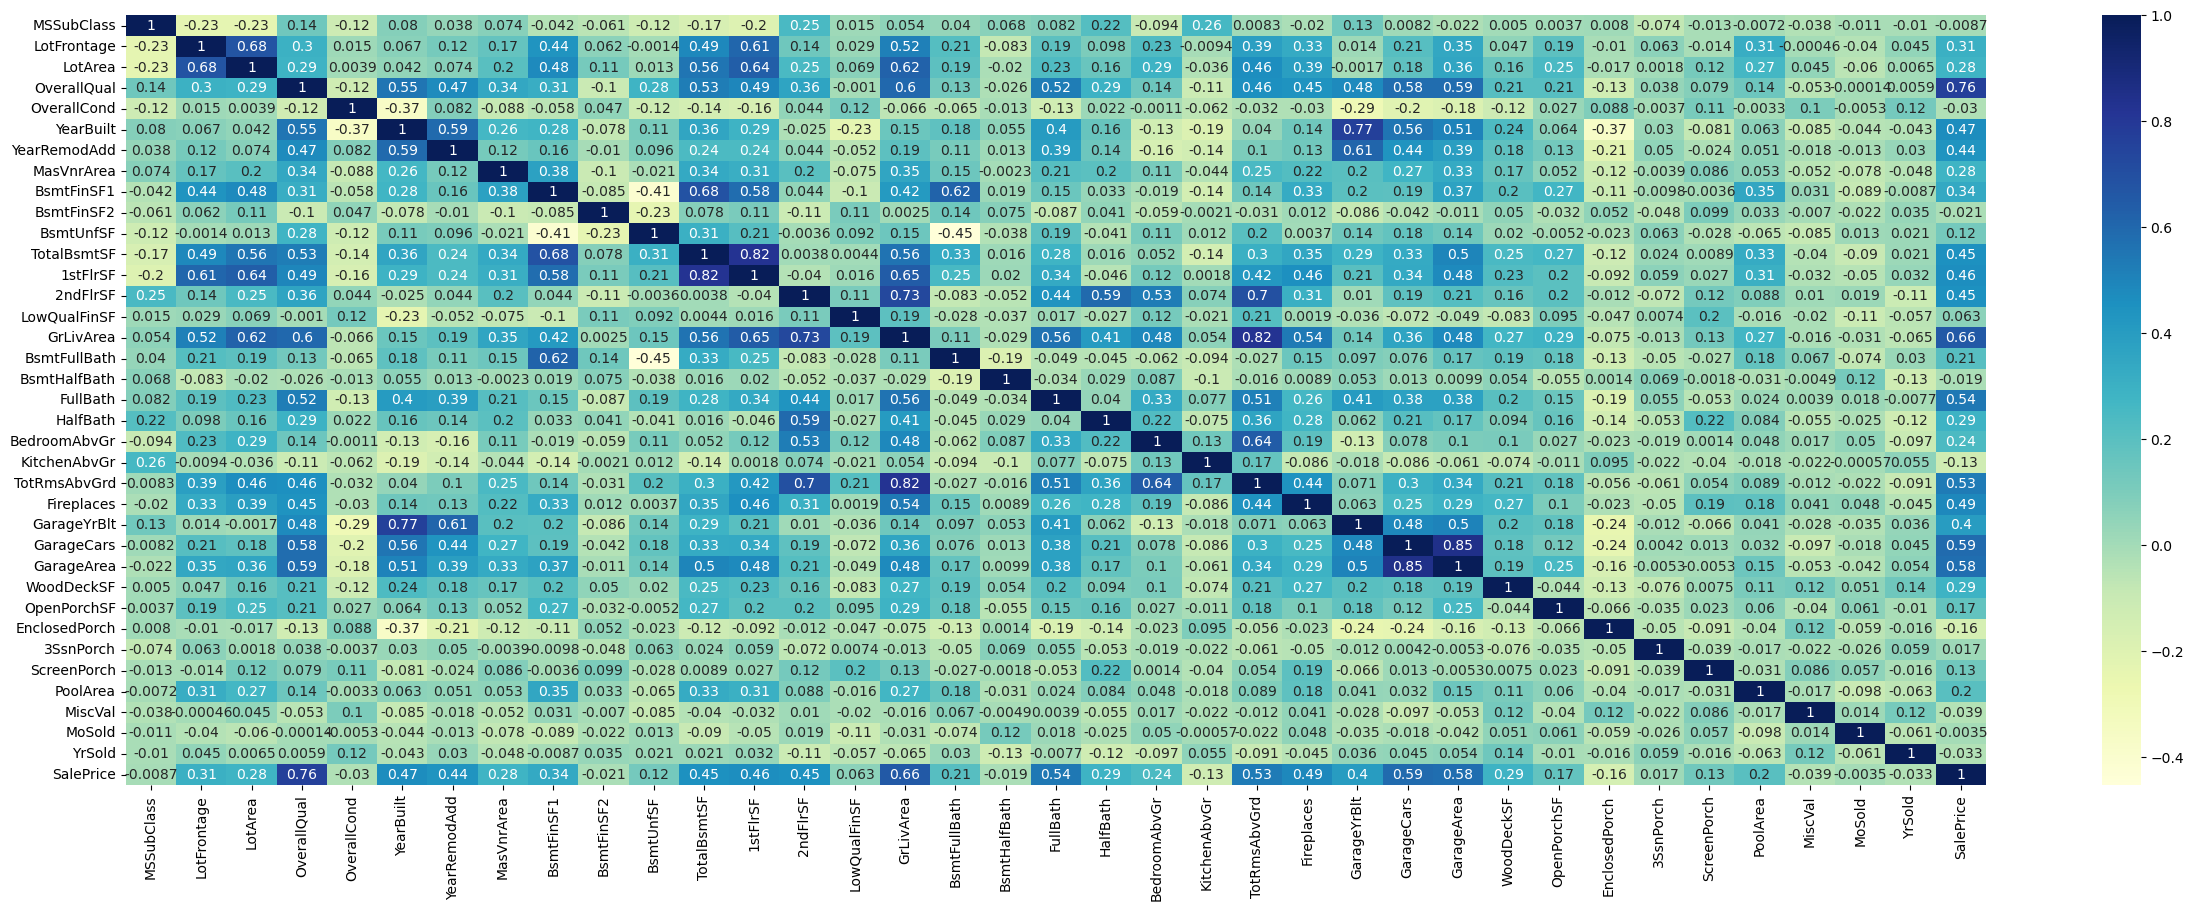

In [79]:
plt.figure(figsize=(30,10))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [80]:
train_data["LotFrontage"]=np.log(train_data['LotFrontage']+1)
train_data["LotArea"]=np.log(train_data['LotArea']+1)
train_data["MasVnrArea"]=np.log(train_data['MasVnrArea']+1)
train_data["BsmtFinSF1"]=np.log(train_data['BsmtFinSF1']+1)
train_data["BsmtFinSF2"]=np.log(train_data['BsmtFinSF2']+1)
train_data["2ndFlrSF"]=np.log(train_data['2ndFlrSF']+1)
train_data["LowQualFinSF"]=np.log(train_data['LowQualFinSF']+1)
train_data["BsmtFullBath"]=np.log(train_data['BsmtFullBath']+1)
train_data["BsmtHalfBath"]=np.log(train_data['BsmtHalfBath']+1)
train_data["HalfBath"]=np.log(train_data['HalfBath']+1)
train_data["OpenPorchSF"]=np.log(train_data['OpenPorchSF']+1)
train_data["EnclosedPorch"]=np.log(train_data['EnclosedPorch']+1)
train_data["3SsnPorch"]=np.log(train_data['3SsnPorch']+1)
train_data["ScreenPorch"]=np.log(train_data['ScreenPorch']+1)
train_data["PoolArea"]=np.log(train_data['PoolArea']+1)
train_data["MiscVal"]=np.log(train_data['MiscVal']+1)
train_data["3SsnPorch"]=np.log(train_data['3SsnPorch']+1)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

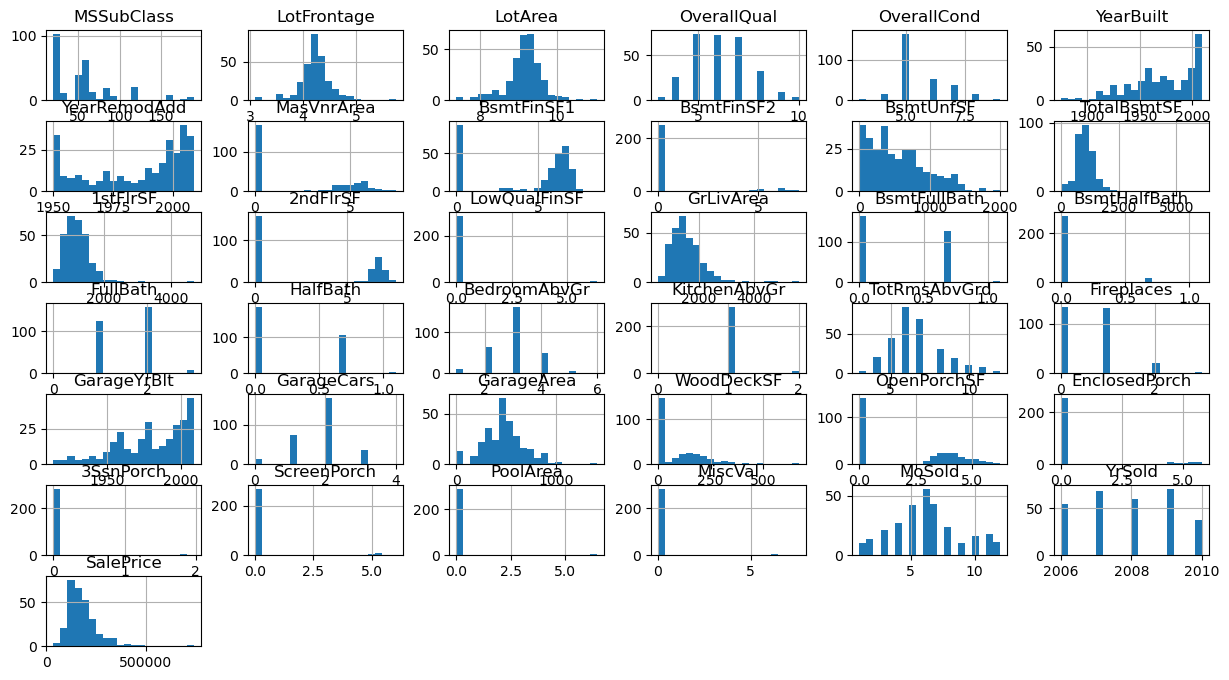

In [81]:
train_data.hist(figsize=(15,8),bins=20)

In [82]:
train_data.SaleCondition.value_counts()

Normal     243
Partial     24
Abnorml     19
Family       3
AdjLand      2
Alloca       1
Name: SaleCondition, dtype: int64

In [83]:
# Assuming you want to count unique values in multiple columns, e.g., 'Column1', 'Column2', 'Column3', ...
columns_to_count = ['Street', 'LotShape', 'LandContour',    
    'Utilities',       
    'LotConfig',      
    'LandSlope',      
  'Neighborhood',   
   'Condition1',                  
   'Condition2',      
   'BldgType',        
 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
  'MasVnrType','ExterQual',       
   'ExterCond',       
   'Foundation',      
   'BsmtQual',        
   'BsmtCond',        
  'BsmtExposure',   
   'BsmtFinType1',
  'BsmtFinType2', 'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
    'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

# Use value_counts() on each specified column
for column in columns_to_count:
    counts = train_data[column].value_counts()
    print(f"Unique values count for {column}:\n{counts}\n")


Unique values count for Street:
Pave    292
Name: Street, dtype: int64

Unique values count for LotShape:
Reg    184
IR1     98
IR2      8
IR3      2
Name: LotShape, dtype: int64

Unique values count for LandContour:
Lvl    261
HLS     13
Bnk     12
Low      6
Name: LandContour, dtype: int64

Unique values count for Utilities:
AllPub    292
Name: Utilities, dtype: int64

Unique values count for LotConfig:
Inside     218
Corner      49
CulDSac     18
FR2          5
FR3          2
Name: LotConfig, dtype: int64

Unique values count for LandSlope:
Gtl    277
Mod     13
Sev      2
Name: LandSlope, dtype: int64

Unique values count for Neighborhood:
NAmes      46
OldTown    25
CollgCr    24
Edwards    23
Gilbert    17
NWAmes     17
Sawyer     16
SawyerW    14
Somerst    13
Timber     12
NridgHt    12
Crawfor    11
Mitchel    10
BrkSide     9
NoRidge     9
ClearCr     8
Blmngtn     6
SWISU       6
IDOTRR      4
StoneBr     4
MeadowV     2
BrDale      2
Veenker     2
Name: Neighborhood, dtype:

In [94]:
# # List of columns to one-hot encode
# columns_to_encode = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
#                       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#                      'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
#                      'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
#                      'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
#                      'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
#                      '3SsnPorch','ScreenPorch','PoolArea','MiscVal',
               
#                     'MiscVal','MoSold','YrSold', 'SalePrice',
                     
#                      'MSSubClass', 'LotFrontage' ,'LotArea' ,'OverallQual' ,'OverallCond','YearBuilt' ,'YearRemodAdd'
#                       ,'MasVnrArea', 'BsmtFinSF1' ,'BsmtFinSF2',
#                       'BsmtUnfSF', 'TotalBsmtSF' ,'1stFlrSF', '2ndFlrSF' ,'LowQualFinSF','GrLivArea', 'BsmtFullBath',
#                       'BsmtHalfBath' ,'FullBath', 'HalfBath','BedroomAbvGr' ,'KitchenAbvGr', 'TotRmsAbvGrd' ,'Fireplaces', 
#                       'GarageYrBlt', 'GarageCars', 'GarageArea' ,'WoodDeckSF', 'OpenPorchSF' ,'EnclosedPorch',
#                       '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MiscVal','MoSold','YrSold','SalePrice','MSSubClass' ] 

                    
# # Create dummy variables for the specified columns
# train_data_encoded = pd.get_dummies(train_data, columns=columns_to_encode)

# # Drop the original columns only if they exist in the DataFrame
# columns_to_drop = [col for col in columns_to_encode if col in train_data]
# train_data_encoded = train_data_encoded.drop(columns=columns_to_drop)

# List of categorical columns to one-hot encode
categorical_columns = ['Street', 'LotShape', 'LandContour',    
    'Utilities',       
    'LotConfig',      
    'LandSlope',      
  'Neighborhood',   
   'Condition1',                  
   'Condition2',      
   'BldgType',        
 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
  'MasVnrType','ExterQual',       
   'ExterCond',       
   'Foundation',      
   'BsmtQual',        
   'BsmtCond',        
  'BsmtExposure',   
   'BsmtFinType1',
  'BsmtFinType2', 'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
    'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

# Create dummy variables for the specified categorical columns
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns)

# Drop the original categorical columns if they exist in the DataFrame
columns_to_drop = [col for col in categorical_columns if col in train_data_encoded]
train_data_encoded = train_data_encoded.drop(columns=columns_to_drop)




In [96]:
train_data_encoded

MSSubClass MSZoning  LotFrontage   LotArea  OverallQual  OverallCond  \
700           20       RL     4.454347  9.570250            8            5   
791           80       RL     4.262680  9.335562            6            5   
208           60       RL     4.262680  9.572550            7            5   
166           20       RL     4.262680  9.278840            5            5   
1422         120       RM     3.637586  8.397508            6            5   
...          ...      ...          ...       ...          ...          ...   
823           50       RL     4.110874  9.200391            6            7   
64            60       RL     4.262680  9.145909            7            5   
272           60       RL     4.532599  9.372884            8            7   
479           30       RM     3.931826  8.687105            4            7   
578          160       FV     3.555348  8.190077            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
700        2002          2002    6.447306    7.150701    0.000000        526   
791        1976          1976    0.000000    6.291569    0.000000        490   
208        1988          1989    4.859812    6.971669    0.000000         92   
166        1955          1993    0.000000    5.940171    6.645091        470   
1422       2003          2003    5.141664    6.532334    0.000000        162   
...         ...           ...         ...         ...         ...        ...   
823        1940          1950    0.000000    0.000000    0.000000        778   
64         1997          1998    6.352629    6.606650    0.000000        318   
272        1999          2007    5.855072    6.263398    0.000000        628   
479        1937          2000    6.077642    5.129899    0.000000        739   
578        2007          2007    0.000000    0.000000    0.000000        689   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
700          1800      1800  0.000000           0.0       1800      0.693147   
791          1029      1062  0.000000           0.0       1062      0.693147   
208          1157      1180  6.783325           0.0       2062      0.693147   
166          1617      1867  0.000000           0.0       1867      0.693147   
1422          848       848  0.000000           0.0        848      0.693147   
...           ...       ...       ...           ...        ...           ...   
823           778       944  6.302619           0.0       1489      0.000000   
64           1057      1057  6.885510           0.0       2034      0.693147   
272          1152      1164  7.009409           0.0       2270      0.000000   
479           907      1131  0.000000           0.0       1131      0.000000   
578           689       703  6.536692           0.0       1392      0.000000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
700            0.0         2  0.000000             3             1   
791            0.0         1  0.000000             3             1   
208            0.0         2  0.693147             3             1   
166            0.0         1  0.000000             2             1   
1422           0.0         1  0.000000             1             1   
...            ...       ...       ...           ...           ...   
823            0.0         2  0.000000             3             1   
64             0.0         2  0.693147             3             1   
272            0.0         2  0.693147             4             1   
479            0.0         1  0.000000             2             1   
578            0.0         2  0.000000             2             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
700              7           1         2002           3         765   
791              5           2         1976           2         539   
208              7           1         1988           2         454   
166              7    

In [108]:
# Replace 'ColumnName' with the name of the column you want to drop
column_to_drop = 'MSZoning'

# Drop the specified column from the DataFrame
train_data_encoded = train_data_encoded.drop(columns=column_to_drop)


<AxesSubplot:>

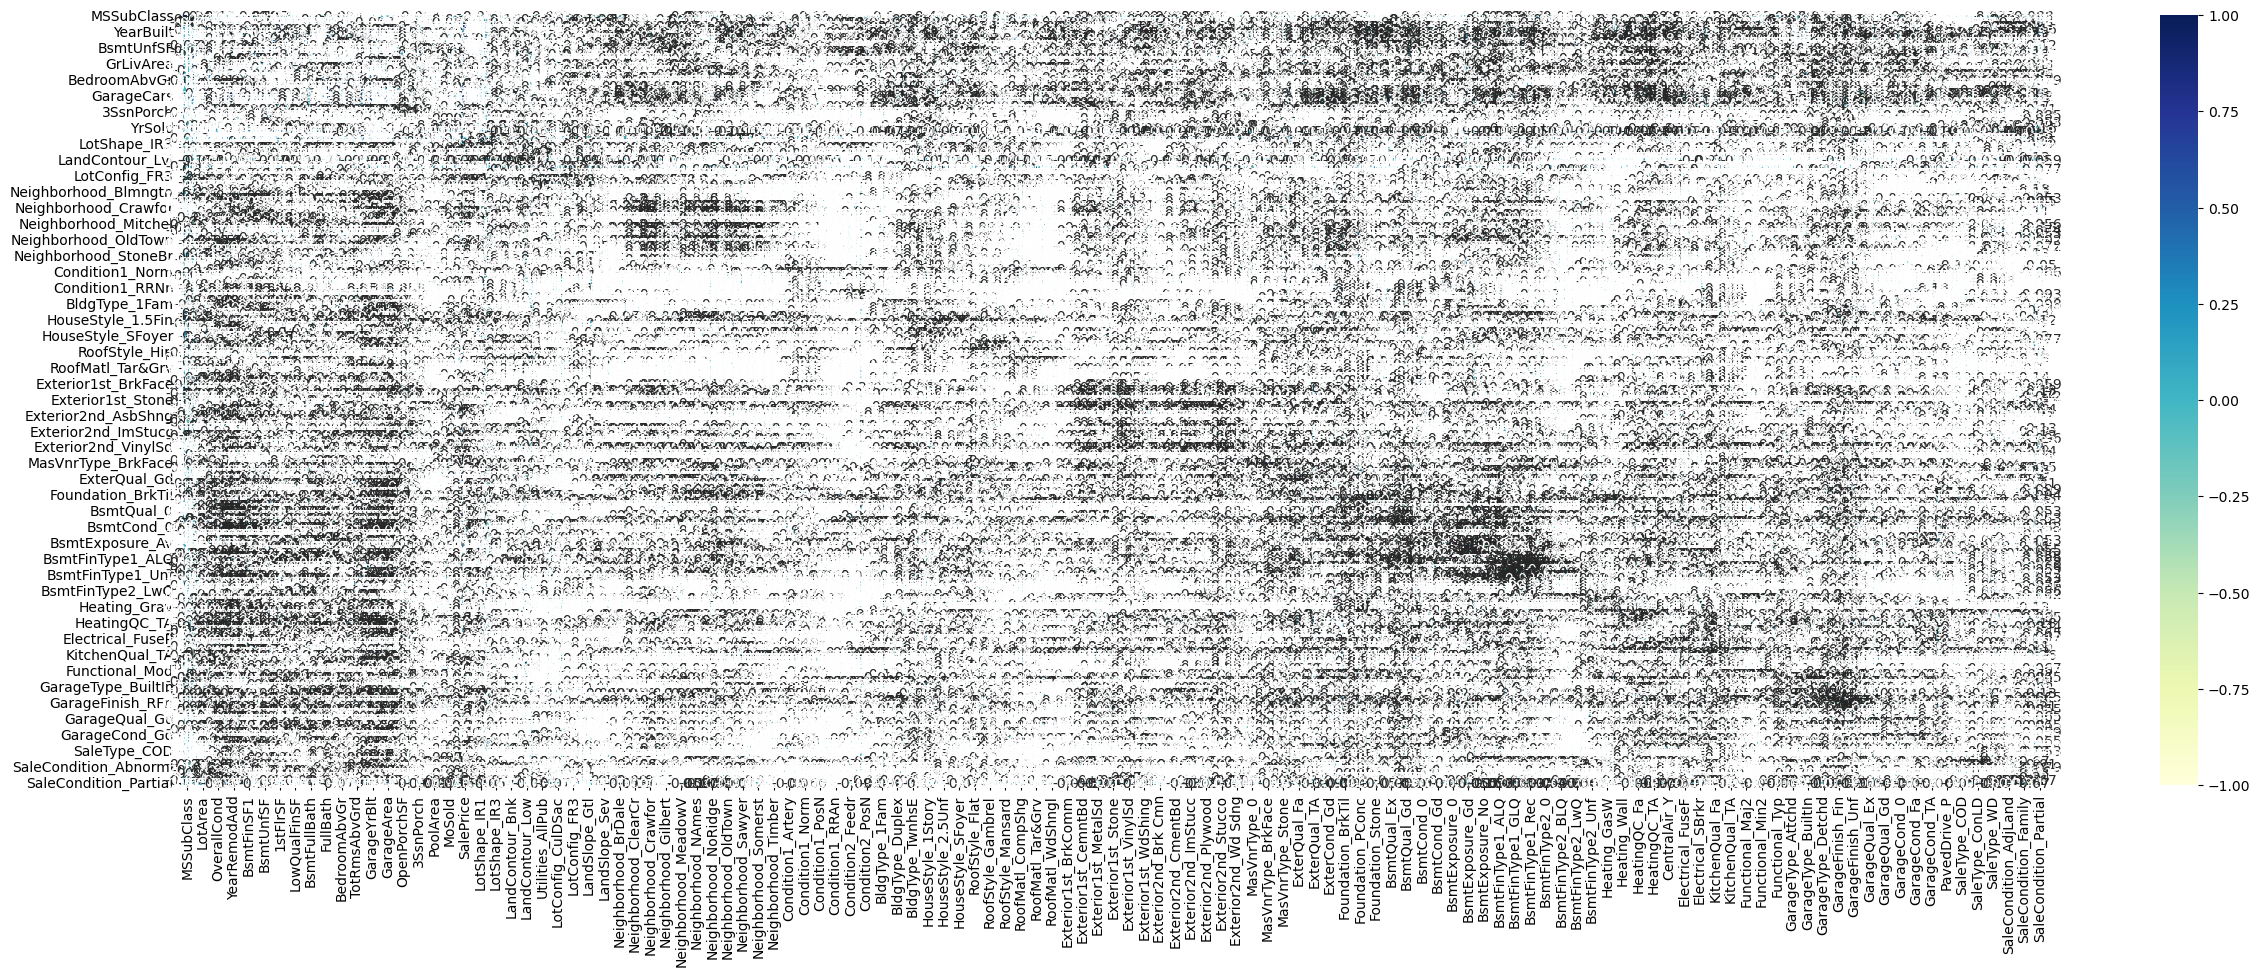

In [98]:
plt.figure(figsize=(30,10))
sns.heatmap(train_data_encoded.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='MSSubClass', ylabel='LotArea'>

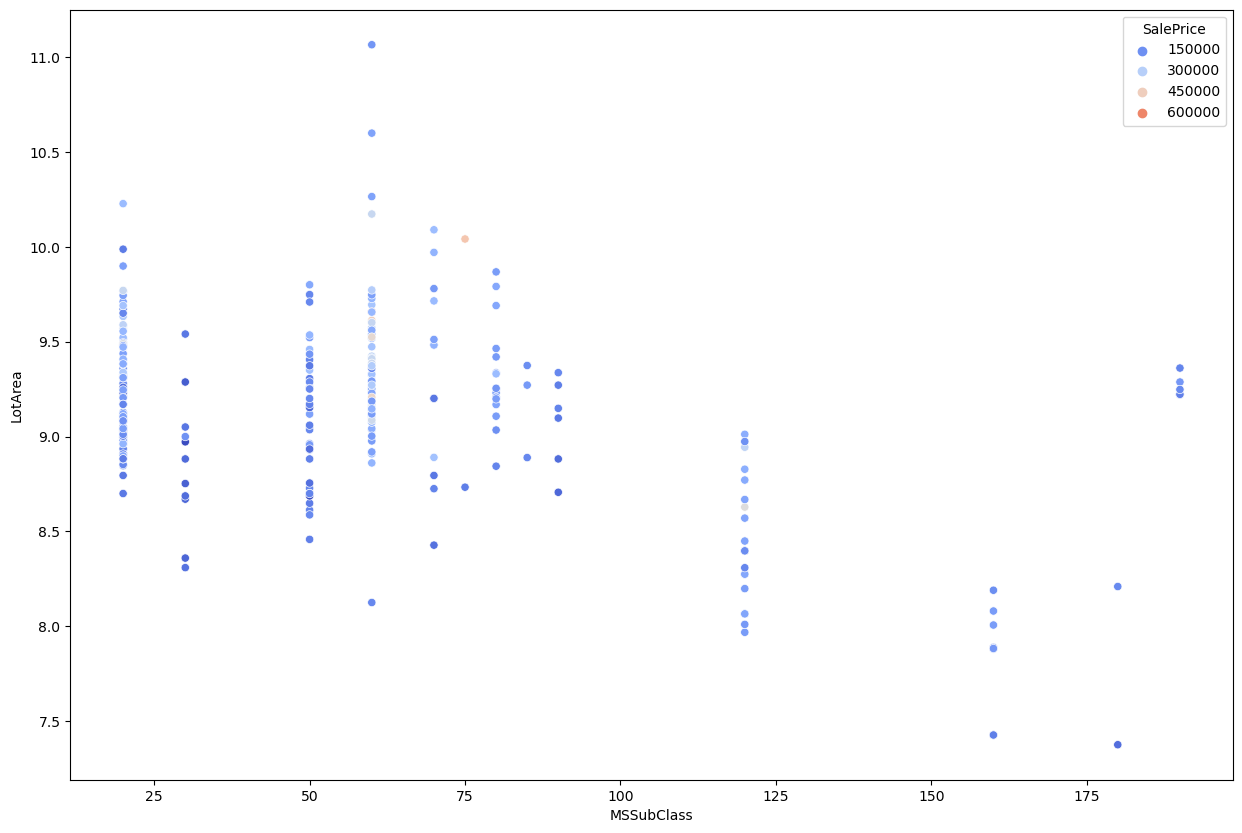

In [104]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='MSSubClass',y='LotArea',data=train_data_encoded,hue='SalePrice',palette='coolwarm')

In [109]:
x_train,y_train=train_data_encoded.drop(["SalePrice"],axis=1),train_data_encoded["SalePrice"]

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [110]:
print("Accuracy --> ", reg.score(x_train, y_train)*100)



Accuracy -->  98.37127539171084


In [111]:
predictions = reg.predict(x_train)


In [112]:
# R Squared error
error_score = metrics.r2_score(y_train, predictions) # coefficient of determination, regression score function.
print('R squared error : ', error_score *100)



R squared error :  98.37127539171084


In [ ]:
# train_data.join(pd.get_dummies(train_data.counts)).drop(['counts'],axis=1)

In [113]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 700 to 578
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    float64
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemo

In [ ]:
data_tt=pd.read_csv("test.csv")

In [ ]:
data_tt

In [ ]:
# data_tt.dropna(inplace=True)
# data_tt